## Import Dependencies

In [14]:
import torch
from models import Generator, Discriminator, DCGenerator, DCDiscriminator,initialize_weights
from utils import train_fcgan,train_dcgan, latent_space_interpolation
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"


# fcGAN on MNIST Data

## Data Analysis

In [2]:
# GANs are sensitive to Hyperparams
# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4  # best lr for Adam given by andrew karpathy: 3e-4
z_dimension = 128 #64,128,256
image_dim = 28*28*1
batch_size = 32
num_epochs = 100
print(device,torch.cuda.get_device_name(0))

cuda NVIDIA RTX A4000


In [3]:
# Dataset and loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])
dataset = datasets.MNIST(root='./data/', transform=transform, download=True)
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

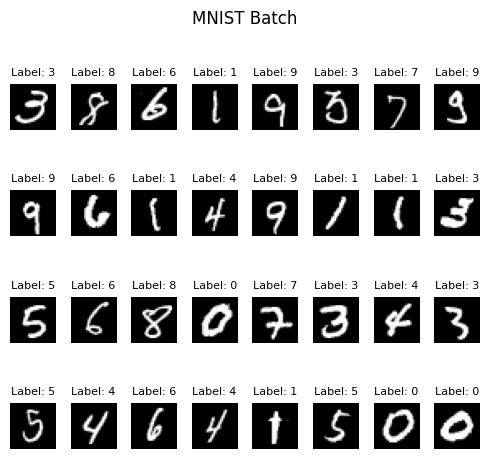

In [4]:
# fetch the first batch
data_iter = iter(loader)
images, labels = next(data_iter)

# undo normalization 
images = images * 0.5 + 0.5  # Convert back to [0, 1] range

# plot the images in a square-like grid
fig, axes = plt.subplots(4, 8, figsize=(5,5))
axes = axes.flatten()  # flatten to easily iterate

# display each image with label
for i in range(32):
    axes[i].imshow(images[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {labels[i].item()}", fontsize=8)
    axes[i].axis("off")

# # hide any unused subplots
# for i in range(loader.batch_size, grid_size * grid_size):
#     fig.delaxes(axes[i])

plt.suptitle('MNIST Batch')
plt.tight_layout()
plt.show()

In [5]:
print(f'Image Dimension: {dataset[0][0].shape}')

Image Dimension: torch.Size([1, 28, 28])


In [6]:
torch.cuda.empty_cache()

## Model

In [7]:
# Model initialization
discriminator = Discriminator(image_dimension=image_dim).to(device)
generator = Generator(z_dimension=z_dimension, image_dimension=image_dim).to(device)

Epoch [0/100] Batch 1874/1874 Loss D: 0.1878, loss G: 2.9555
Epoch [1/100] Batch 1874/1874 Loss D: 0.2139, loss G: 2.1955
Epoch [2/100] Batch 1874/1874 Loss D: 0.2505, loss G: 2.6473
Epoch [3/100] Batch 1874/1874 Loss D: 0.1929, loss G: 1.9823
Epoch [4/100] Batch 1874/1874 Loss D: 0.3839, loss G: 1.8090
Epoch [5/100] Batch 1874/1874 Loss D: 0.4988, loss G: 1.3139
Epoch [6/100] Batch 1874/1874 Loss D: 0.4540, loss G: 1.3060
Epoch [7/100] Batch 1874/1874 Loss D: 0.3911, loss G: 1.5663
Epoch [8/100] Batch 1874/1874 Loss D: 0.4068, loss G: 1.4243
Epoch [9/100] Batch 1874/1874 Loss D: 0.4050, loss G: 1.0296
Epoch [10/100] Batch 1874/1874 Loss D: 0.4455, loss G: 1.3172
Epoch [11/100] Batch 1874/1874 Loss D: 0.3430, loss G: 1.2997
Epoch [12/100] Batch 1874/1874 Loss D: 0.4967, loss G: 1.1451
Epoch [13/100] Batch 1874/1874 Loss D: 0.3821, loss G: 1.3860
Epoch [14/100] Batch 1874/1874 Loss D: 0.4790, loss G: 1.5441
Epoch [15/100] Batch 1874/1874 Loss D: 0.4787, loss G: 1.1711
Epoch [16/100] Bat

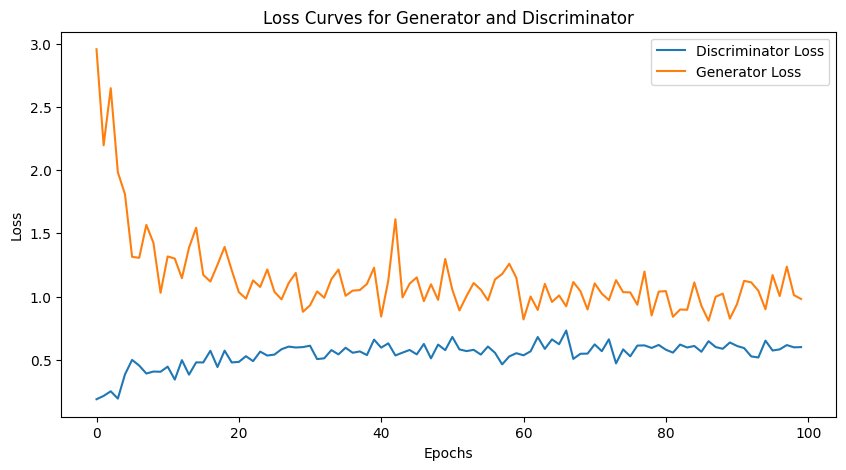

In [8]:
# Training
train_fcgan(generator, discriminator, loader, device, num_epochs, z_dimension, lr)

# dcGAN on CIFAR 10

## Data Analysis

In [9]:
# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr_gen = 2e-4
lr_disc = 1e-4
z_dimension = 64 # 64
channels_img = 3  
batch_size = 128 # 128
num_epochs = 100
features_d=128
features_g=64
image_size = 32 # 32


transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
dataset = datasets.CIFAR10(root='./data/', transform=transform, download=True)
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


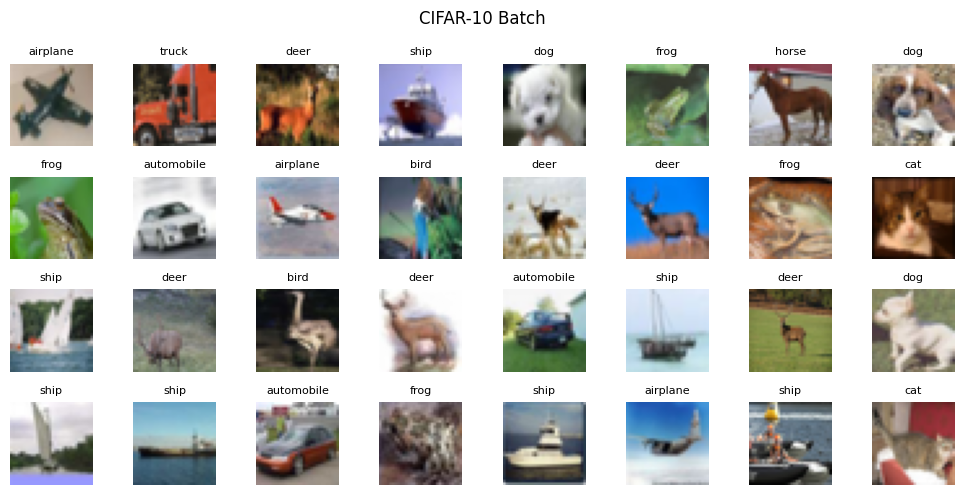

In [10]:
# CIFAR-10 class labels
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

# Fetch the first batch
data_iter = iter(loader)
images, labels = next(data_iter)

# Undo normalization 
images = images * 0.5 + 0.5  # Convert back to [0, 1] range

# Plot the images in a 4x8 grid
fig, axes = plt.subplots(4, 8, figsize=(10, 5))
axes = axes.flatten()  # Flatten to easily iterate

for i in range(32):
    axes[i].imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
    axes[i].set_title(f"{cifar10_classes[labels[i].item()]}", fontsize=8)
    axes[i].axis("off")

# Hide any unused subplots
for i in range(32, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('CIFAR-10 Batch')
plt.tight_layout()
plt.show()


In [11]:
images.shape

torch.Size([128, 3, 32, 32])

## Model

Epoch [0/100] Batch 390/390 Loss D: 0.2174, Loss G: 3.4634
Epoch [1/100] Batch 390/390 Loss D: 0.2649, Loss G: 2.9766
Epoch [2/100] Batch 390/390 Loss D: 0.2964, Loss G: 2.8270
Epoch [3/100] Batch 390/390 Loss D: 0.2778, Loss G: 2.4055
Epoch [4/100] Batch 390/390 Loss D: 0.3517, Loss G: 4.0206
Epoch [5/100] Batch 390/390 Loss D: 0.2961, Loss G: 2.5888
Epoch [6/100] Batch 390/390 Loss D: 0.4884, Loss G: 4.2142
Epoch [7/100] Batch 390/390 Loss D: 0.3033, Loss G: 2.7235
Epoch [8/100] Batch 390/390 Loss D: 0.4092, Loss G: 1.8227
Epoch [9/100] Batch 390/390 Loss D: 0.2765, Loss G: 2.9948
Epoch [10/100] Batch 390/390 Loss D: 0.2596, Loss G: 2.9675
Epoch [11/100] Batch 390/390 Loss D: 0.3757, Loss G: 1.3994
Epoch [12/100] Batch 390/390 Loss D: 0.4585, Loss G: 3.5573
Epoch [13/100] Batch 390/390 Loss D: 0.3005, Loss G: 2.4780
Epoch [14/100] Batch 390/390 Loss D: 0.2929, Loss G: 2.0407
Epoch [15/100] Batch 390/390 Loss D: 0.3038, Loss G: 2.9526
Epoch [16/100] Batch 390/390 Loss D: 0.3577, Loss 

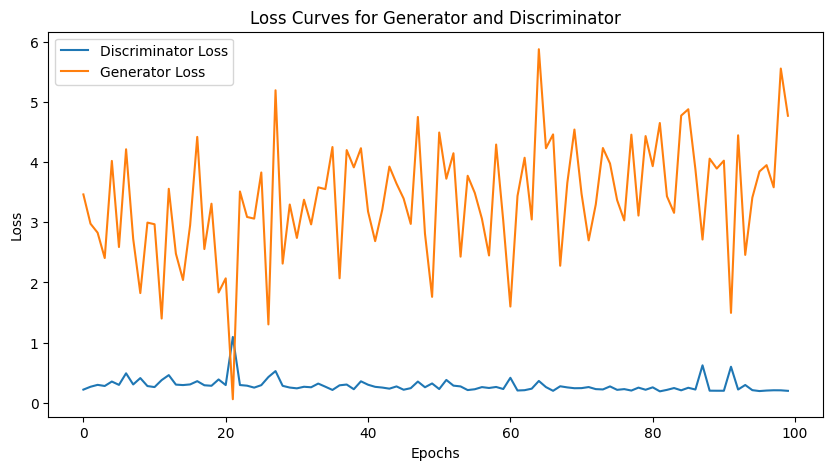

In [12]:
# Initialize DCGAN Models
dcdiscriminator = DCDiscriminator(img_channels=channels_img, features_d=features_d).to(device)
dcgenerator = DCGenerator(z_dimension=z_dimension, img_channels=channels_img, features_g=features_g).to(device)

# Initialize weights
initialize_weights(dcdiscriminator)
initialize_weights(dcgenerator)

# Training
train_dcgan(dcgenerator, dcdiscriminator, loader, device, num_epochs, z_dimension, lr_gen,lr_disc)

# Latent Space Interpolation

## fcGAN MNIST

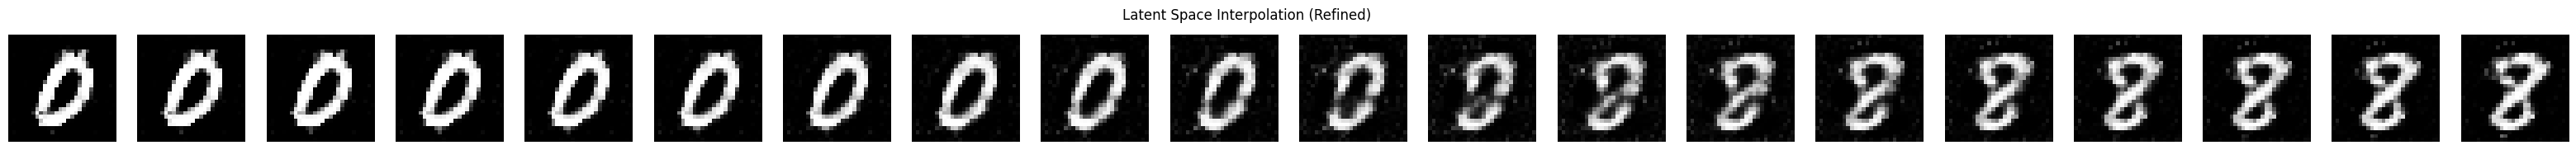

In [13]:
latent_space_interpolation(generator=generator,z_dim=128, num_steps=20, device='cpu')